In [ ]:
!pip install bs4

In [ ]:
!pip install requests

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup


In [ ]:
#url of the website that contains the data
url="https://www.nestle.com/media/pressreleases/allpressreleases/full-year-results-2021"
r= requests.get(url) # http requests
#print(r)

<Response [200]>


In [ ]:
soup = BeautifulSoup(r.text,"lxml")
#print(soup)
table = soup.find("table",class_="Default-Nestle-Table")
title = table.find_all("th")

# Find the first 'tr' (table row) element within the 'table'
first_row = soup.find('table').find('tr')
# Find all 'td' (table data) and 'th' (table header) elements within the first row and extract the text from them
column_headers = [cell.text.strip() for cell in first_row.find_all(['td', 'th'])]

# Print the table headers from the first row
print(column_headers)

# Create an empty DataFrame with the extracted column headers
df = pd.DataFrame(columns=column_headers)

# Find all 'tr' elements within the 'table' except the first one (skip the header row)
data_rows = soup.find('table').find_all('tr')[1:]
# Iterate through the data rows and extract cell data
for row in data_rows:
    cell_data = [cell.text.strip() for cell in row.find_all(['th', 'td'])]
    df = df.append(pd.Series(cell_data, index=column_headers), ignore_index=True)



# Print the resulting DataFrame
df






['', 'Total Group', 'Zone AMS', 'Zone EMENA', 'Zone AOA', 'Nespresso', 'Nestlé Health Science', 'Other Businesses']


<ipython-input-44-cd009481e05f>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(cell_data, index=column_headers), ignore_index=True)
<ipython-input-44-cd009481e05f>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(cell_data, index=column_headers), ignore_index=True)
<ipython-input-44-cd009481e05f>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(cell_data, index=column_headers), ignore_index=True)
<ipython-input-44-cd009481e05f>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(cell_data, index=column_headers), ignore_index=True)
<ipy

,,Total Group,Zone AMS,Zone EMENA,Zone AOA,Nespresso,Nestlé Health Science,Other Businesses
0,Sales FY-2021 (CHF m),87 088,33 779,21 128,20 735,6 418,4 822,206
1,Sales FY-2020 (CHF m)*,84 343,34 010,20 226,20 730,5 885,3 326,166
2,Real internal growth (RIG),5.5%,4.8%,6.0%,3.5%,8.2%,13.4%,25.1%
3,Pricing,2.0%,3.7%,1.2%,0.8%,0.6%,0.1%,1.2%
4,Organic growth,7.5%,8.5%,7.2%,4.2%,8.8%,13.5%,26.3%
5,Net M&A,- 2.9%,- 6.6%,- 2.2%,- 3.9%,0.0%,33.2%,0.0%
6,Foreign exchange,- 1.3%,- 2.5%,- 0.6%,- 0.4%,0.3%,- 1.8%,- 1.8%
7,Reported sales growth,3.3%,- 0.7%,4.5%,0.0%,9.1%,45.0%,24.5%
8,FY-2021 Underlying TOP Margin,17.4%,20.8%,18.5%,21.8%,23.0%,13.6%,- 15.6%
9,FY-2020 Underlying TOP Margin*,17.7%,20.5%,18.6%,22.2%,23.6%,16.5%,- 43.9%


In [ ]:
# Sales data for Total Group
sales_2021 = 87088
sales_2020 = 84343

# Calculate the mean
mean_sales = (sales_2021 + sales_2020) / 2

# Print the mean
print("Mean Sales for Total Group:", mean_sales)

Mean Sales for Total Group: 85715.5


In [5]:
#calculating mean of sales of FY-2020-2021
import numpy as np

# Sales data for FY-2020 and FY-2021
sales_2020 = [84343, 34010, 20226, 20730, 5885, 3326]
sales_2021 = [87088, 33779, 21128, 20735, 6418, 4822]

# Calculate the mean for 2020 and 2021
mean_sales_2020 = np.mean(sales_2020)
mean_sales_2021 = np.mean(sales_2021)

# Print the means
print("Mean Sales FY-2020:", mean_sales_2020)
print("Mean Sales FY-2021:", mean_sales_2021)

Mean Sales FY-2020: 28086.666666666668
Mean Sales FY-2021: 28995.0


In [ ]:
#sorting the data in decnding order
# Data
zones = ["Zone AMS", "Zone EMENA", "Zone AOA", "Nespresso", "Nestlé Health Science", "Other Businesses"]
pricing_percentages = [2.0, 3.7, 1.2, 0.8, 0.6, 0.1]

# Create a list of tuples containing the zone and pricing percentage
data = list(zip(zones, pricing_percentages))

# Sort the data by pricing percentage in descending order
sorted_data = sorted(data, key=lambda x: x[1], reverse=True)

# Print the sorted data
for item in sorted_data:
    print(item[0], ":", item[1], "%")

Zone EMENA : 3.7 %
Zone AMS : 2.0 %
Zone AOA : 1.2 %
Nespresso : 0.8 %
Nestlé Health Science : 0.6 %
Other Businesses : 0.1 %


In [4]:
#calculating modes of sales of FY-2020and 2021
import statistics

# Sales data for FY-2020 and FY-2021
sales_2020 = [84343, 34010, 20226, 20730, 5885, 3326]
sales_2021 = [87088, 33779, 21128, 20735, 6418, 4822]

# Calculate the mode for 2020 and 2021
mode_sales_2020 = statistics.mode(sales_2020)
mode_sales_2021 = statistics.mode(sales_2021)

# Print the modes
print("Mode Sales FY-2020:", mode_sales_2020)
print("Mode Sales FY-2021:", mode_sales_2021)


Mode Sales FY-2020: 84343
Mode Sales FY-2021: 87088


In [3]:
#calculating median of sales of FY-2020and 2021
import numpy as np

# Sales data for FY-2020 and FY-2021
sales_2020 = [84343, 34010, 20226, 20730, 5885, 3326]
sales_2021 = [87088, 33779, 21128, 20735, 6418, 4822]

# Calculate the median for 2020 and 2021
median_sales_2020 = np.median(sales_2020)
median_sales_2021 = np.median(sales_2021)

# Print the medians
print("Median Sales FY-2020:", median_sales_2020)
print("Median Sales FY-2021:", median_sales_2021)

Median Sales FY-2020: 20478.0
Median Sales FY-2021: 20931.5


In [ ]:
#calculating the correlation matrix
import pandas as pd

# Create a DataFrame with your data
data = {
    'Zone AMS': [87088, 84343, 5.5, 2.0, 7.5, -2.9, -1.3, 3.3, 17.4, 17.7],
    'Zone EMENA': [33779, 34010, 4.8, 3.7, 8.5, -6.6, -2.5, -0.7, 20.8, 20.5],
    'Zone AOA': [21128, 20226, 6.0, 1.2, 7.2, -2.2, -0.6, 4.5, 18.5, 18.6],
    'Nespresso': [20735, 20730, 3.5, 0.8, 4.2, -3.9, -0.4, 0.0, 21.8, 22.2],
    'Nestlé Health Science': [6418, 5885, 8.2, 0.6, 8.8, 0.0, 0.3, 9.1, 23.0, 23.6],
    'Other Businesses': [4822, 3326, 13.4, 0.1, 13.5, 33.2, -1.8, 45.0, 13.6, 16.5],
}

df = pd.DataFrame(data, index=['Sales FY-2021 (CHF m)', 'Sales FY-2020 (CHF m)*', 'Real internal growth (RIG)', 'Pricing', 'Organic growth', 'Net M&A', 'Foreign exchange', 'Reported sales growth', 'FY-2021 Underlying TOP Margin', 'FY-2020 Underlying TOP Margin*'])

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

                       Zone AMS  Zone EMENA  Zone AOA  Nespresso  \
Zone AMS               1.000000    0.999764  0.999979   0.999842   
Zone EMENA             0.999764    1.000000  0.999602   0.999992   
Zone AOA               0.999979    0.999602  1.000000   0.999706   
Nespresso              0.999842    0.999992  0.999706   1.000000   
Nestlé Health Science  0.999528    0.998630  0.999707   0.998829   
Other Businesses       0.982837    0.978603  0.984012   0.979406   

                       Nestlé Health Science  Other Businesses  
Zone AMS                            0.999528          0.982837  
Zone EMENA                          0.998630          0.978603  
Zone AOA                            0.999707          0.984012  
Nespresso                           0.998829          0.979406  
Nestlé Health Science               1.000000          0.988009  
Other Businesses                    0.988009          1.000000  


In [ ]:
pip install pandas seaborn matplotlib


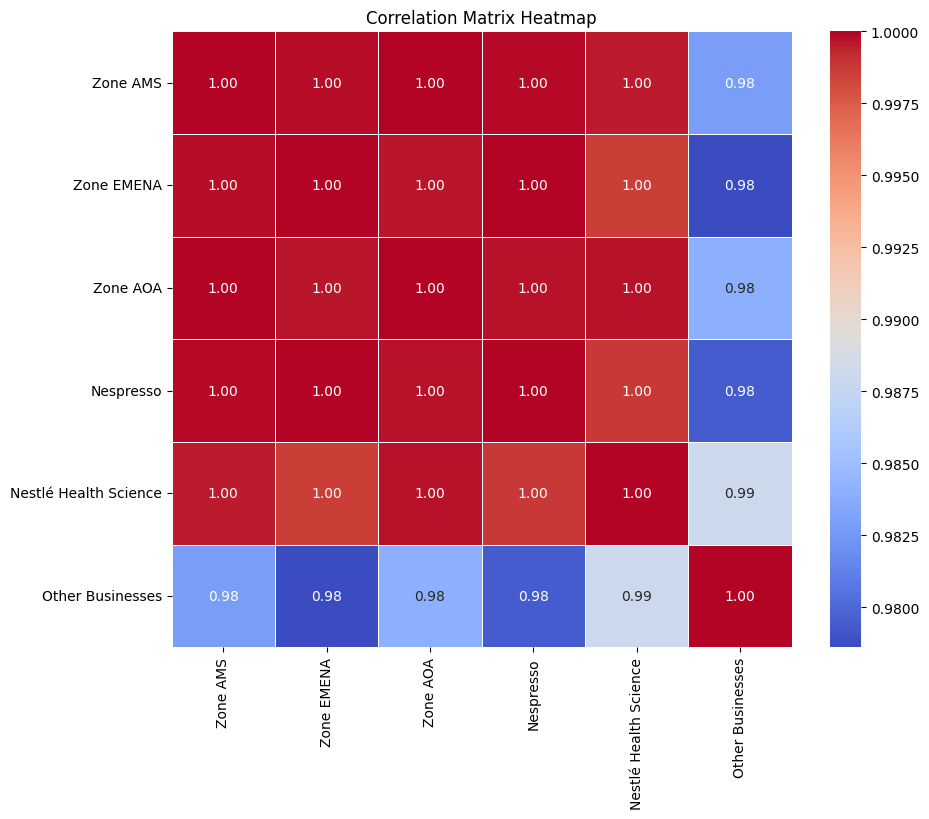

In [ ]:
#creating heatmap of correlation matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with your data
data = {
    'Zone AMS': [87088, 84343, 5.5, 2.0, 7.5, -2.9, -1.3, 3.3, 17.4, 17.7],
    'Zone EMENA': [33779, 34010, 4.8, 3.7, 8.5, -6.6, -2.5, -0.7, 20.8, 20.5],
    'Zone AOA': [21128, 20226, 6.0, 1.2, 7.2, -2.2, -0.6, 4.5, 18.5, 18.6],
    'Nespresso': [20735, 20730, 3.5, 0.8, 4.2, -3.9, -0.4, 0.0, 21.8, 22.2],
    'Nestlé Health Science': [6418, 5885, 8.2, 0.6, 8.8, 0.0, 0.3, 9.1, 23.0, 23.6],
    'Other Businesses': [4822, 3326, 13.4, 0.1, 13.5, 33.2, -1.8, 45.0, 13.6, 16.5],
}

df = pd.DataFrame(data, index=['Sales FY-2021 (CHF m)', 'Sales FY-2020 (CHF m)*', 'Real internal growth (RIG)', 'Pricing', 'Organic growth', 'Net M&A', 'Foreign exchange', 'Reported sales growth', 'FY-2021 Underlying TOP Margin', 'FY-2020 Underlying TOP Margin*'])

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [1]:
#sort by top 3 on the basis of sales FY-2021
import pandas as pd

# Create a DataFrame with your data
data = {
    'Product': ['Zone AMS', 'Zone EMENA', 'Zone AOA', 'Nespresso', 'Nestlé Health Science', 'Other Businesses'],
    'Sales FY-2021 (CHF m)': [87088, 33779, 21128, 20735, 6418, 4822],
}

df = pd.DataFrame(data)

# Sort the DataFrame by sales in descending order
sorted_df = df.sort_values(by='Sales FY-2021 (CHF m)', ascending=False)

# Get the top 3 products
top_3_products = sorted_df.head(3)

# Print the top 3 products
print(top_3_products)

      Product  Sales FY-2021 (CHF m)
0    Zone AMS                  87088
1  Zone EMENA                  33779
2    Zone AOA                  21128


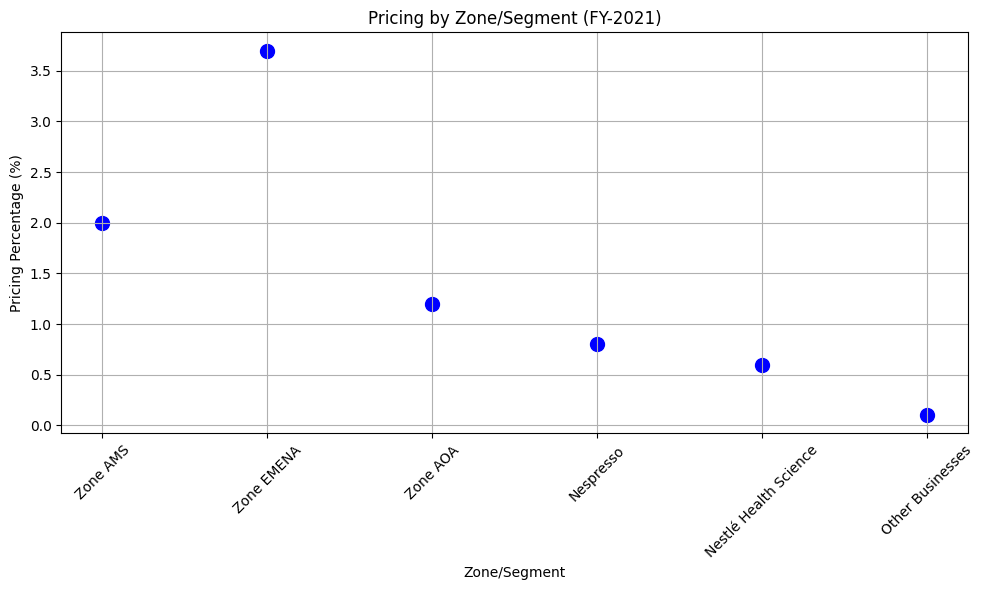

In [2]:
#scatter plot of pricing by zone/segment(FY-2021)
import matplotlib.pyplot as plt

# Pricing data
zones = ["Zone AMS", "Zone EMENA", "Zone AOA", "Nespresso", "Nestlé Health Science", "Other Businesses"]
pricing_percentages = [2.0, 3.7, 1.2, 0.8, 0.6, 0.1]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(zones, pricing_percentages, color='blue', marker='o', s=100)
plt.title('Pricing by Zone/Segment (FY-2021)')
plt.xlabel('Zone/Segment')
plt.ylabel('Pricing Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

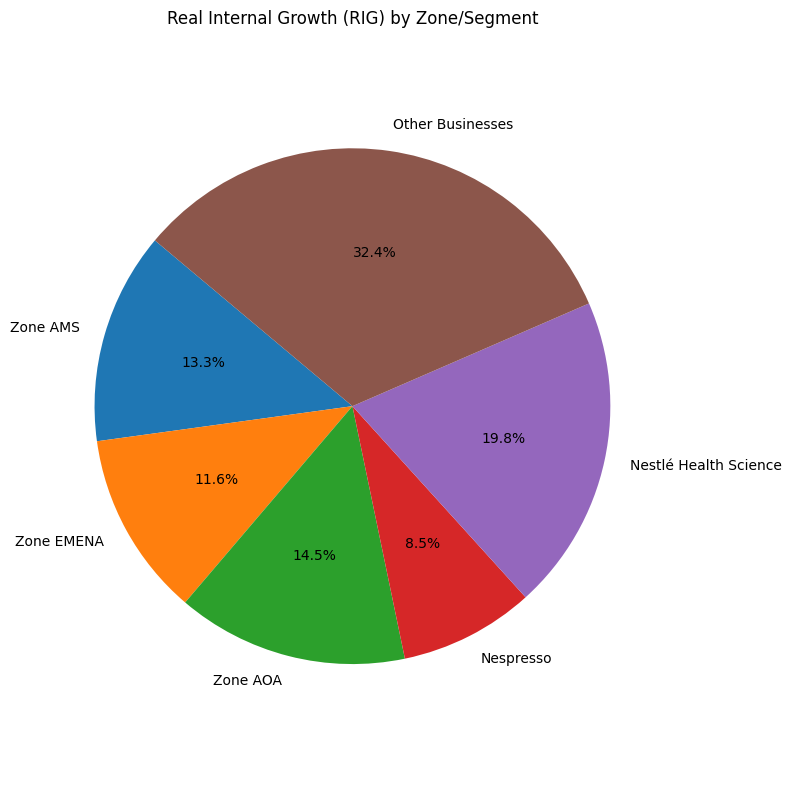

In [4]:
#pie chart representation of real internal growth(rig)
import matplotlib.pyplot as plt

# Real Internal Growth (RIG) data
zones = ["Zone AMS", "Zone EMENA", "Zone AOA", "Nespresso", "Nestlé Health Science", "Other Businesses"]
rig_percentages = [5.5, 4.8, 6.0, 3.5, 8.2, 13.4]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rig_percentages, labels=zones, autopct='%1.1f%%', startangle=140)
plt.title('Real Internal Growth (RIG) by Zone/Segment')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

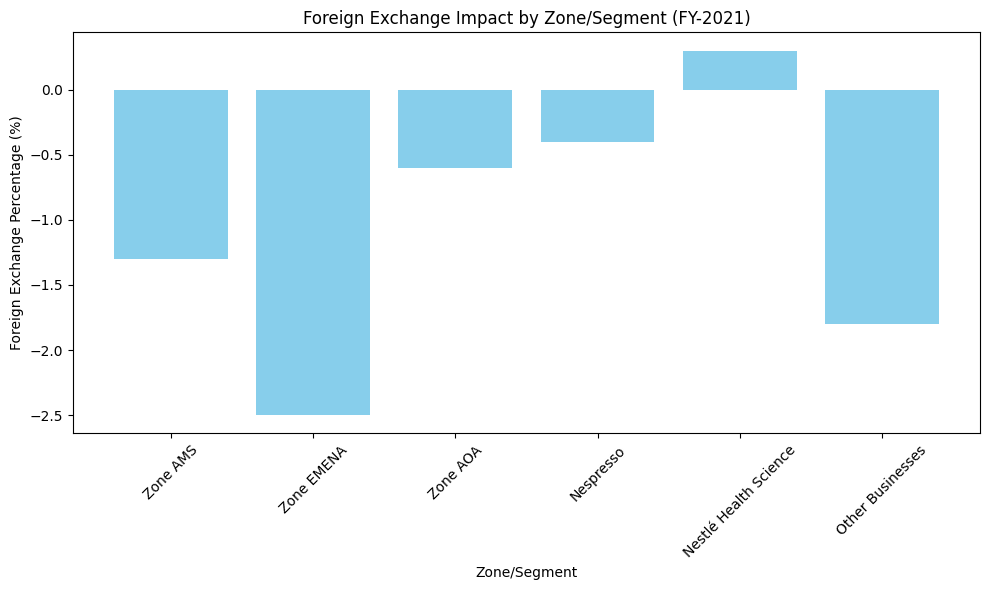

In [5]:
#histogram presentation of Foreign exchange impact by zone/segment
import matplotlib.pyplot as plt

# Foreign Exchange data
zones = ["Zone AMS", "Zone EMENA", "Zone AOA", "Nespresso", "Nestlé Health Science", "Other Businesses"]
exchange_percentages = [-1.3, -2.5, -0.6, -0.4, 0.3, -1.8]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(zones, exchange_percentages, color='skyblue')
plt.title('Foreign Exchange Impact by Zone/Segment (FY-2021)')
plt.xlabel('Zone/Segment')
plt.ylabel('Foreign Exchange Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.tight_layout()
plt.show()


In [6]:
#sorting top 3 Top margin
import pandas as pd

# Create a DataFrame with your data
data = {
    'Zone/Segment': ["Zone AMS", "Zone EMENA", "Zone AOA", "Nespresso", "Nestlé Health Science", "Other Businesses"],
    'FY-2021 Underlying TOP Margin': [17.4, 20.8, 18.5, 21.8, 23.0, 13.6],
}

df = pd.DataFrame(data)

# Sort the DataFrame by FY-2021 Underlying TOP Margin in descending order
sorted_df = df.sort_values(by='FY-2021 Underlying TOP Margin', ascending=False)

# Get the top 3 zones/segments with the highest FY-2021 Underlying TOP Margin
top_3_margin = sorted_df.head(3)

# Print the top 3 zones/segments
print(top_3_margin)

            Zone/Segment  FY-2021 Underlying TOP Margin
4  Nestlé Health Science                           23.0
3              Nespresso                           21.8
1             Zone EMENA                           20.8


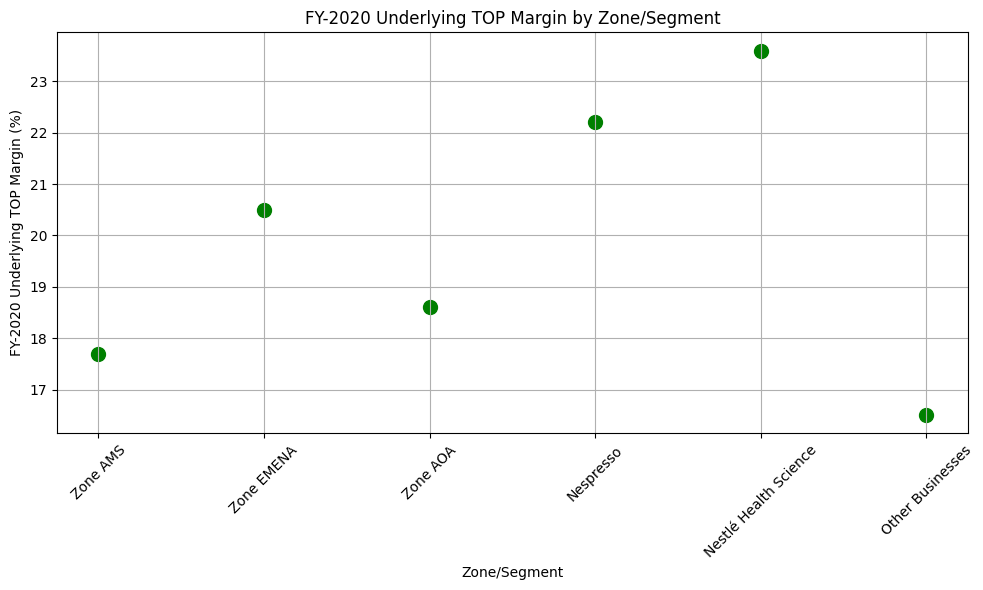

In [7]:
#scatter plot of Top Margin Data FY-2020

import matplotlib.pyplot as plt

# FY-2020 Underlying TOP Margin data
zones = ["Zone AMS", "Zone EMENA", "Zone AOA", "Nespresso", "Nestlé Health Science", "Other Businesses"]
margin_values = [17.7, 20.5, 18.6, 22.2, 23.6, 16.5]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(zones, margin_values, color='green', marker='o', s=100)
plt.title('FY-2020 Underlying TOP Margin by Zone/Segment')
plt.xlabel('Zone/Segment')
plt.ylabel('FY-2020 Underlying TOP Margin (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
#calculating standard deviation of sales 2020

import numpy as np

# Sales FY-2020 (CHF m)* data
sales_2020 = [84343, 34010, 20226, 20730, 5885, 3326]

# Calculate the standard deviation
std_deviation_sales_2020 = np.std(sales_2020)

# Print the standard deviation
print("Standard Deviation of Sales FY-2020 (CHF m)*:", std_deviation_sales_2020)

Standard Deviation of Sales FY-2020 (CHF m)*: 27147.056805890068


In [9]:
#sorting the data on the basis of columns

import pandas as pd

# Create a DataFrame with your data
data = {
    'Zone/Segment': ["Zone AMS", "Zone EMENA", "Zone AOA", "Nespresso", "Nestlé Health Science", "Other Businesses"],
    'Sales FY-2021 (CHF m)': [87088, 33779, 21128, 20735, 6418, 4822],
    'Sales FY-2020 (CHF m)*': [84343, 34010, 20226, 20730, 5885, 3326],
    'Reported sales growth': [3.3, -0.7, 4.5, 0.0, 9.1, 45.0]
}

df = pd.DataFrame(data)

# Sort the DataFrame by multiple columns
sorted_df = df.sort_values(by=['Sales FY-2021 (CHF m)', 'Sales FY-2020 (CHF m)*', 'Reported sales growth'], ascending=False)

# Print the sorted DataFrame
print(sorted_df)

            Zone/Segment  Sales FY-2021 (CHF m)  Sales FY-2020 (CHF m)*  \
0               Zone AMS                  87088                   84343   
1             Zone EMENA                  33779                   34010   
2               Zone AOA                  21128                   20226   
3              Nespresso                  20735                   20730   
4  Nestlé Health Science                   6418                    5885   
5       Other Businesses                   4822                    3326   

   Reported sales growth  
0                    3.3  
1                   -0.7  
2                    4.5  
3                    0.0  
4                    9.1  
5                   45.0  


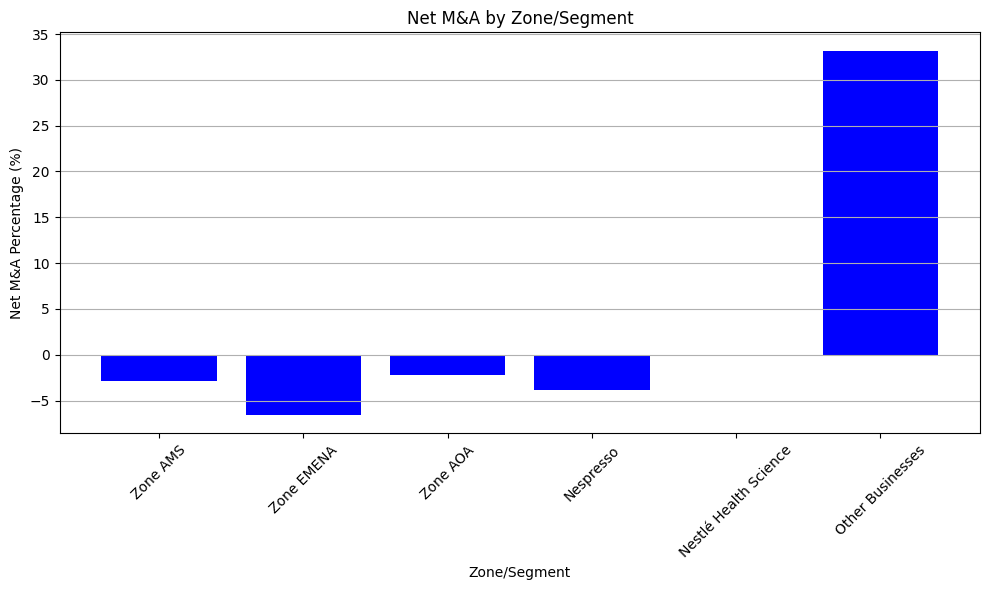

In [10]:
#histogram representation of net M&A by Zone/segment
import matplotlib.pyplot as plt

# Net M&A data
zones = ["Zone AMS", "Zone EMENA", "Zone AOA", "Nespresso", "Nestlé Health Science", "Other Businesses"]
net_m_and_a_percentages = [-2.9, -6.6, -2.2, -3.9, 0.0, 33.2]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(zones, net_m_and_a_percentages, color='blue')
plt.title('Net M&A by Zone/Segment')
plt.xlabel('Zone/Segment')
plt.ylabel('Net M&A Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [11]:
#correlation between sales of 2020 and 2021

import numpy as np

# Sales data for FY-2020 and FY-2021
sales_2020 = [84343, 34010, 20226, 20730, 5885, 3326]
sales_2021 = [87088, 33779, 21128, 20735, 6418, 4822]

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(sales_2020, sales_2021)[0, 1]

# Print the correlation coefficient
print("Correlation between Sales FY-2020 and Sales FY-2021:", correlation_coefficient)

Correlation between Sales FY-2020 and Sales FY-2021: 0.9995841163920407


In [2]:
#calculating sales ratio of 2020 and 2021
import pandas as pd

# Create a DataFrame with your data
data = {
    'Zone': ["Zone AMS", "Zone EMENA", "Zone AOA", "Nespresso", "Nestlé Health Science", "Other Businesses"],
    'Sales FY-2020 (CHF m)': [84343, 34010, 20226, 20730, 5885, 3326],
    'Sales FY-2021 (CHF m)': [87088, 33779, 21128, 20735, 6418, 4822],
}

df = pd.DataFrame(data)

# Calculate the ratio of sales for each column
df['Sales Ratio (2021/2020)'] = df['Sales FY-2021 (CHF m)'] / df['Sales FY-2020 (CHF m)']

# Print the DataFrame with the ratios
print(df)

                    Zone  Sales FY-2020 (CHF m)  Sales FY-2021 (CHF m)  \
0               Zone AMS                  84343                  87088   
1             Zone EMENA                  34010                  33779   
2               Zone AOA                  20226                  21128   
3              Nespresso                  20730                  20735   
4  Nestlé Health Science                   5885                   6418   
5       Other Businesses                   3326                   4822   

   Sales Ratio (2021/2020)  
0                 1.032546  
1                 0.993208  
2                 1.044596  
3                 1.000241  
4                 1.090569  
5                 1.449790  
